1) Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. .

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen.

4) El examen resuelto debe quedar en este único archivo. No se puede usar un archivo para cada pregunta.

5) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 


CALIFICACIÓN:


In [2]:
2+1+4

7

COMENTARIOS:

1)

## Ejercicio 1

(3 puntos) Podemos estimar el valor de $\alpha(x):=\sqrt{1+x}$ como $\beta(x):=1+(x/2)$ cuando $x$ es,  en valor absoluto,  suficientement próximo a cero. Consideramos que la estimación *es aceptable* cuando  el error relativo $$E(x):=\frac{abs(\alpha(x)-\beta(x))}{\alpha(x)}$$ que cometemos es menor que $0.01$. 

1) Determina, experimentalmente,  una cota $\vert x\vert < A$ tal que la estimación es aceptable para los $x$ que la cumplen, y deja de serlo para $\vert x\vert \ge A$. 

2) ¿Qué podemos hacer para mejorar la estimación? Postula una nueva estimación $\beta_1(x)$ y demuestra que con ella se obtienen resultados bastante más precisos.

In [7]:
'1.)'

R = RealField(prec=100)

def alfa(x, preci):
    return sqrt(1 + x).n(prec = preci)

def beta(x, preci):
    return 1 + (x/2).n(prec = preci)

def error(x, preci):
    return abs(alfa(x, preci)-beta(x, preci))/alfa(x, preci)

cota = 0
preci = 10
i = R(0.0)

'Voy aumentando i con el incremento que yo diga, y viendo cuándo sale del bucle puedo saber la cota máxima'

incr = 0.00001
while error(i, preci) < 0.01:
    cota = i
    i += incr
print(cota)

0.302490000000162


Podemos observar que la cota (A) es 0.30249..., si aumentaramos la precisión y el incr, podríamos ser más finos dando este número.

In [117]:
'2.)'
'Si queremos resultados más precisos, podemos rediseñar beta'

def beta1(x, preci):
    return 1 + (x/2).n(prec = preci) + (x/4).n(prec = preci)

def error1(x, preci):
    return abs(alfa(x, preci)-beta1(x, preci))/alfa(x, preci)

cota = 0
preci = 10
i = R(0.0)

'Voy aumentando i con el incremento que yo diga, y viendo cuándo sale del bucle puedo saber la cota máxima'

incr = 0.00001
while error1(i, preci) < 0.01:
    cota = i
    i += incr
print(cota)

0.0370700000000007


## Ejercicio 2

(3 puntos) John Napier publicó su invención de los logaritmos en 1614, mucho antes de la invención del cálculo diferencial. El punto esencial para que los logaritmos fueran útiles era la existencia de *tablas de logaritmos* en las que uno encontraba los logaritmos de los factores, que sumaba a mano, y volvía a usar para encontrar el número cuyo logaritmo era la suma obtenida, es decir,  el producto de los números de partida. 
Henry Briggs colaboró con Napier para producir las primeras tablas de logaritmos mediante el siguiente procedimiento:

1) Queremos calcular el logaritmo de un entero $n>1$. Calculamos $n^{1/2^k}$ para $k=1,2,3,\dots$ hasta que el resultado difiera *muy poco* de $1$. Esto es lo mismo que iterar la extracción de raíces cuadradas hasta llegar casi a $1$. Escribimos 
$$n^{1/2^k}=1+x.$$

2) Ahora tomamos logaritmos para obtener 
$$log(n)=2^klog(1+x).$$

3) Finalmente, Briggs observó que para $x$ suficientemente pequeño en valor absoluto, podía sustituir $log(1+x)$ por $x$, y quedaba $log(n)$ aproximadamente igual a  $2^kx.$ 

Es claro que lo que necesitamos es saber *cómo de pequeño tiene que ser $x$ para obtener un número prefijado $k$ de cifras decimales exactas del logaritmo de $n$.*

A) Define una función $buscar(n,k,precis)$ que debe efectuar el procedimiento de Briggs hasta que la estimación obtenida tenga el número $k$ de cifras correctas de $log(n)$, y en ese momento debe devolver $x$. La precisión arbitraria en los cálculos, determinada por el parámetro *precis* hace falta porque sin ella un cierto bucle $while$ puede hacerse infinito cuando $n$ o $k$ son *grandes*. 

B) Experimenta con la función del primer apartado y, como consecuencia,  enuncia y comprueba la regla que indica cómo de pequeño tiene que ser $x$ para obtener $k$ cifras correctas del logaritmo de $n$.

In [1]:
'A)'

def Briggs(n, x, precis):
    R = RealField(prec  = precis)
    i = 1
    while R((n ^ (1/2^i))) != 1:
        i += 1
    'Ya tenemos calculado i (k en la fórmula)'
    
    return R((2^i)*x)
    

def buscar(n,k,precis):
    R = RealField(prec  = precis)
    
    x = R(1)
    'Imponemos que tenga un número de cifras k correctas en la condición del while'
    while floor((10^k)*abs(R(log(n))-Briggs(n,x, precis))) != 0:
        x -= 0.1
    return x

'B)'

buscar(3, 2, 5)


KeyboardInterrupt: 

## Ejercicio 3

(4 puntos) El método BBP que permite calcular una cifra determinada de $\pi$, la $n$-ésima, sin calcular las anteriores se puede aplicar a algunas otras constantes. Por ejemplo, para $log(2)$ se puede usar la serie
$$log(2)=\sum_{k=1}^{\infty}\frac{1}{2^kk}.$$

1) En la primera celda se reproduce el código BPP para $\pi$, y lo primero que debes hacer es modificarlo para que funcione para $log(2)$ mediante la serie indicada. La última función, la que devuelve cifras binarias de $log(2)$, debe llamarse $cifra\_log2(n)$. 

2) Modifica el código del apartado 1) para haga todos los cálculos con una precisión (en bits) arbitraria, es decir, la nueva función debe llamarse $cifra\_log2(n,precis)$.

3) Define una función $compara(C1,C2)$ que, dadas dos cadenas de caracteres,  cuente, hasta la primera discrepancia,  el número de caracteres de $C1$ que ocupan el mismo lugar en $C2$. Es decir, si el primer caracter es diferente debe devolver cero, si el primero es igual pero el segundo es diferente debe devolver uno, etc.

4) Jugando con la función  $cifra\_log2(n,precis)$ se observa que cuanto mayor es la precisión más cifras correctas de $log(2)$, a partir de la $n$-ésima,  devuelve, y que fijada la precisión el número de cifras correctas no depende mucho de $n$ y es del orden de la precisión. 
La parte final del ejercicio consiste en comprobar sistemáticamente  estas afirmaciones, para lo que debemos comparar  cadenas $C1$ generadas por $cifra\_log2(n,precis)$ con la parte relevante de  cadenas $C2$  $$(log(2).n(prec=precis)).str(base=2,no\_sci=2)$$
que nos dan las cifras correctas de $log(2).$ El parámetro $no\_sci=2$ sirve para que no se devuelva el resultado en notación científica estándar (i.e. parte entera de un único dígito, decimales,  y exponente de una potencia de $10$).



In [23]:
def F0(j,n):
    S =RR(0.0)
    k =0 
    while k <= n:
        r = 8*k+j
        S += RR(power_mod(16,n-k,r)/r)-floor(RR(power_mod(16,n-k,r)/r))
        k += 1
    return RR(S)

def F1(j,n):
    S =RR(0.0)
    k =n+1
    while 1:
        r = 8*k+j
        nS = S+ RR(16^(n-k)/r)
        if S == nS:
            break
        else:
            S = nS
        k += 1
    return RR(S)

def S(j,n):
    return RR(F0(j,n)+F1(j,n))

def cifra_pi(n):
    n -= 1
    x = (4*RR(S(1,n))-2*RR(S(4,n))-RR(S(5,n))-RR(S(6,n)))
    return (x-floor(x)).str(base=16,no_sci=2)



In [25]:
'1.)'

forget()

def F01(n):
    S =RR(0.0)
    k = 1 
    while k <= n:
        r = k
        S += RR(power_mod(2,n-k,r)/r)-floor(RR(power_mod(2,n-k,r)/r))
        k += 1
    return RR(S)

def F11(n):
    S =RR(0.0)
    k =n+1
    while 1:
        r = k
        nS = S+ RR(2^(n-k)/r)
        if S == nS:
            break
        else:
            S = nS
        k += 1
    return RR(S)

def S1(n):
    return RR(F01(n)+F11(n))

def cifra_log2(n):
    n -= 1
    x = RR(S1(n))
    return (x-floor(x)).str(base=2,no_sci=2)
cifra_log2(2)

'0.011000101110010000101111111011111010001110011110111011'

In [37]:
'2.)'

forget()

def F01(n,precis):
    R = RealField(prec=precis)
    S =R(0.0)
    k = 1 
    while k <= n:
        r = k
        S += R(power_mod(2,n-k,r)/r)-floor(R(power_mod(2,n-k,r)/r))
        k += 1
    return R(S)

def F11(n,precis):
    R = RealField(prec=precis)
    S =R(0.0)
    k =n+1
    while 1:
        r = k
        nS = S+ R(2^(n-k)/r)
        if S == nS:
            break
        else:
            S = nS
        k += 1
    return R(S)

def S1(n,precis):
    R = RealField(prec=precis)
    return R(F01(n,precis)+F11(n,precis))

def cifra_log2(n,precis):
    n -= 1
    R = RealField(prec=precis)
    x = R(S1(n, precis))
    return (x-floor(x)).str(base=2,no_sci=2)

precis = 200
cifra_log2(2, precis)

'0.011000101110010000101111111011111010001110011110111100110101011110010011110001110110011100110000000001111110010111101101010111101000000111100110100001100100110011100101001100010110110001011011000100110'

In [99]:
'3.)'

def compara(C1, C2):
    len1 = len(C1)
    len2 = len(C2)
    i = 0
    while (C1[i] == C2[i]):
        i+=1
        'Comprobamos si nos hemos pasado de longitud en alguna de las cadenas'
        if i > (len1-1) or i > (len2-1):
            break
    return i

'Comprobamos que funciona'
x = compara("comi", "comilona")
x

4

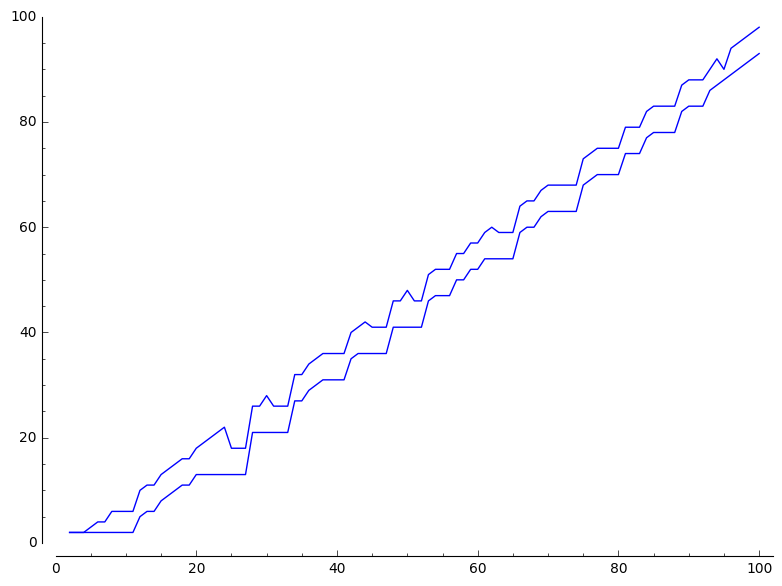

In [112]:
'4.)'

precisMax = 100
'Probamos con dos n diferentes'
n = 5
n1= 10

L = []
L1 = []

for i in xsrange(2, precisMax+1):
    C1 = cifra_log2(n,i)
    C2 = (log(2).n(prec = i)).str(base = 2, no_sci = 2)
    'Cortamos la cadena de log(2) en la cifra que nos interesa y añadimos 0. al principio'
    C3 = '0.' + C2[n+1:]
    res = compara(C1,C3)
    L.append((i,res))
    
    C1 = cifra_log2(n1,i)
    C2 = (log(2).n(prec = i)).str(base = 2, no_sci = 2)
    'Cortamos la cadena de log(2) en la cifra que nos interesa y añadimos 0. al principio'
    C3 = '0.' + C2[n1+1:]
    res = compara(C1,C3)
    L1.append((i,res))
    
line(L)+line(L1)



In [113]:
var('a b')
model(x) = a*x + b

find_fit(L, model)

[a == 0.9983055040197861, b == -3.004489795927107]

En la gráfica superior podemos comprobar cómo al aumentar la precisión, aumenta el número de cifras correctas, también vemos que n no afecta mucho una vez fijada dicha precisión, las dos gráficas están bastante próximas y tienen la misma tendencia. Podemos apreciar, que el número de cifras correctas es aproximadamente el número de precisión que hayamos incluido, ya que la pendiente de la recta es aproximadamente 1, ('a') en nuestro model (del cual hacemos fit).